In [1]:
from pathlib import Path

import matplotlib as mpl

# mpl.use("pdf")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gsd_metrics import SCALES, GSD_FACTOR
from gsd_utils import papermode

papermode(plt=plt, size=8)

# width as measured in inkscape
width = 3.281
height = width / 1.618

In [2]:
patch_size = 184
subset = "test"

In [3]:
# Paths
results_dir = Path.cwd() / "results"
gsd_resdir = results_dir / "gsd" / subset / "resize"
df = pd.read_csv(gsd_resdir / f"gsd-{subset}-p{patch_size}.csv")

figs_path = Path("figs") / "gsds"
figs_path.mkdir(exist_ok=True, parents=True)

In [4]:
df

,GSD,scale,iou,acc,f1
0,GSD0,1.000000,0.237582,0.475267,0.336873
1,GSD0,1.000000,0.298024,0.585231,0.368240
2,GSD0,1.000000,0.352291,0.610110,0.457090
3,GSD0,1.000000,0.144104,0.033398,0.223837
4,GSD0,1.000000,0.303768,0.744045,0.372424
...,...,...,...,...,...
139,GSD3,0.296296,0.025332,0.046564,0.047085
140,GSD3,0.296296,0.058535,0.166694,0.100801
141,GSD3,0.296296,0.061704,0.190179,0.101476
142,GSD3,0.296296,0.000000,0.000000,0.000000


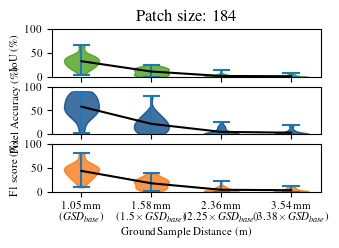

In [5]:
fig, axs = plt.subplots(nrows=3, sharex=True)
fig.subplots_adjust(left=.17, bottom=.17, right=.99, top=.97)

ious = [100 * df[df.GSD == gsd].iou for gsd in df.GSD.unique()]
accs = [100 * df[df.GSD == gsd].acc for gsd in df.GSD.unique()]
f1s = [100 * df[df.GSD == gsd].f1 for gsd in df.GSD.unique()]

m_IOU = [iou.mean() for iou in ious]
m_acc = [acc.mean() for acc in accs]
m_f1 = [f1.mean() for f1 in f1s]

vio_ious = axs[0].violinplot(ious, showmeans=False)
vio_accs = axs[1].violinplot(accs, showmeans=False)
vio_f1s = axs[2].violinplot(f1s, showmeans=False)
inv_scales = 1 / SCALES
xlabs = ["$1.05$ mm\n(${GSD}_{base}$)"]
gsdsnum = inv_scales[:, None] @ np.array([1, 1.05])[None, :]
for gsds in gsdsnum.round(2)[1:, :]:
    gsd, avg = gsds
    xlabs.append(f"${avg}$ mm\n(${gsd}\\times {{GSD}}_{{base}}$)")

for pc_iou in vio_ious["bodies"]:
    pc_iou.set_facecolor("xkcd:grass green")
    pc_iou.set_edgecolor("xkcd:grass green")
    pc_iou.set_alpha(0.75)

for pc_acc in vio_accs["bodies"]:
    pc_acc.set_facecolor("xkcd:darkish blue")
    pc_acc.set_edgecolor("xkcd:darkish blue")
    pc_acc.set_alpha(0.75)

for pc_f1 in vio_f1s["bodies"]:
    pc_f1.set_facecolor("xkcd:orange")
    pc_f1.set_edgecolor("xkcd:orange")
    pc_f1.set_alpha(0.75)

xticks = 1 + np.arange(SCALES.size)

axs[0].plot(xticks, m_IOU, "k")
axs[1].plot(xticks, m_acc, "k")
axs[2].plot(xticks, m_f1, "k")

axs[2].set_xticks(xticks, xlabs)
axs[2].set_xlabel("Ground Sample Distance (m)")

axs[0].set_ylabel("IoU (\%)")
axs[1].set_ylabel("Pixel Accuracy (\%)")
axs[2].set_ylabel("F1 score (\%)")

axs[0].set_title(f"Patch size: {patch_size}")

axs[0].set_ylim(bottom=0, top=100)
axs[1].set_ylim(bottom=0, top=100)
axs[2].set_ylim(bottom=0, top=100)

fig.set_size_inches(width, height)

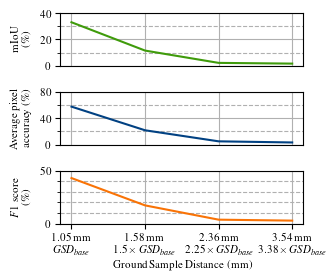

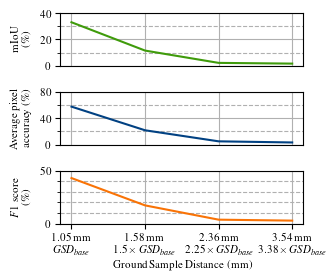

In [6]:
fig, axs = plt.subplots(nrows=3, sharex=True)
fig.subplots_adjust(left=0.17, bottom=0.15, right=0.91, top=0.98, hspace=0.5)

ious = [100 * df[df.GSD == gsd].iou for gsd in df.GSD.unique()]
accs = [100 * df[df.GSD == gsd].acc for gsd in df.GSD.unique()]
f1s = [100 * df[df.GSD == gsd].f1 for gsd in df.GSD.unique()]

m_IOU = [iou.mean() for iou in ious]
m_acc = [acc.mean() for acc in accs]
m_f1 = [f1.mean() for f1 in f1s]

inv_scales = 1 / SCALES
xlabs = ["$1.05$ mm\n${GSD}_{base}$"]
gsdsnum = inv_scales[:, None] @ np.array([1, 1.05])[None, :]
for gsds in gsdsnum.round(2)[1:, :]:
    gsd, avg = gsds
    xlabs.append(f"${avg}$ mm\n${gsd}\\times {{GSD}}_{{base}}$")


axs[0].plot(
    gsdsnum[:, 1],
    m_IOU,
    color="xkcd:grass green",
)  # , marker="o", linestyle="",)
axs[1].plot(
    gsdsnum[:, 1],
    m_acc,
    color="xkcd:darkish blue",
)  # , marker="o", linestyle="",)
axs[2].plot(gsdsnum[:, 1], m_f1, color="xkcd:orange")  # , marker="o", linestyle="",)

axs[0].set_ylabel(
    "mIoU\n(\%)",
    # rotation=0,
    # ha="right",
    # va="center",
)
axs[1].set_ylabel(
    "Average pixel\naccuracy (\%)",
    # rotation=0,
    # ha="right",
    # va="center",
)
axs[2].set_ylabel(
    "$F1$ score\n(\%)",
    # rotation=0,
    # ha="right",
    # va="center",
)
axs[2].set_xlabel("Ground Sample Distance (mm)")

axs[0].yaxis.set_label_coords(-0.12, 0.5)
axs[1].yaxis.set_label_coords(-0.12, 0.5)
axs[2].yaxis.set_label_coords(-0.12, 0.5)

axs[0].tick_params(bottom=False)
axs[1].tick_params(bottom=False)

axs[0].set_ylim(bottom=0, top=40)
axs[1].set_ylim(bottom=0, top=80)
axs[2].set_ylim(bottom=0, top=50)

axs[2].set_xscale("log", base=GSD_FACTOR)
axs[2].xaxis.set_major_formatter(plt.ScalarFormatter())
axs[2].set_xticks(gsdsnum[:, 1], xlabs)

axs[0].yaxis.set_minor_locator(plt.MultipleLocator(10))
axs[1].yaxis.set_major_locator(plt.MultipleLocator(40))
axs[1].yaxis.set_minor_locator(plt.MultipleLocator(20))
axs[2].yaxis.set_major_locator(plt.MultipleLocator(50))
axs[2].yaxis.set_minor_locator(plt.MultipleLocator(10))

axs[0].grid(visible=True, which="major", axis="both")
axs[1].grid(visible=True, which="major", axis="both")
axs[2].grid(visible=True, which="major", axis="both")
axs[0].grid(visible=True, which="minor", axis="y", linestyle="--")
axs[1].grid(visible=True, which="minor", axis="y", linestyle="--")
axs[2].grid(visible=True, which="minor", axis="y", linestyle="--")

fig.set_size_inches(width, 1.25 * height)
fig.savefig(figs_path / f"gsds-{subset}-{patch_size}.pdf")
fig